# Práctica 4: Convolución en sistemas discretos.

La operación de convolución en los sistemas de tiempo discreto se basa en la descomposición en términos de la función impulso de una señal de tiempo discreto ({cite}`Alkin`). La operación de convolución para sistemas de tiempo discreto se define como:

```{math}
:label: conv_discreta
\begin{equation}
y[n]=x[n]*h[n]=\sum^{\infty}_{k=-\infty} h[k]x[n-k]
\end{equation}
````
donde $n=0,1,2,3...n$, $h[n]$ es la versión en tiempo discreto de la respuesta al impulso y $x[n]$ es la función de entrada al sistema o estímulo. 

```{admonition} Convolución de sistemas de tiempo discreto:

El operador convolución de la señal de entrada $x[n]$ y la respuesta al impulso de un sistema de tiempo discreto $h[n]$ proporciona la salida $y[n]$ del sistema como:

```{math}
:label: convolucion_conmuta_1
\begin{eqnarray}
  y[n]=x[n]*h[n]=\sum^{\infty}_{k=-\infty}h[k]x[n-k]\\
  y[n]=h[n]*x[n]=\sum^{\infty}_{k=-\infty}x[k]h[n-k]\\
	\end{eqnarray}
```
## Filtrado de señales

Una de las aplicaciónes de la convolución es el filtrado de señales. Hemos calculado la respuesta al impulso de los sistemas RLC y masa-resorte-amortiguador. Estos dos sistemas son considerados filtros pasa bajas, dado que presentan una respuesta ante una señal tipo barrido frecuencial que tiene un máximo en la frecuencia natural o resonancia. El circuito RC es considerado un filtro de primer orden y permite en aplicaciones de electrónica filtrar altas frecuencias e incluso disminuir el ruido. 

El siguiente ejemplo muestra el uso de un sistema o circuito RC como un filtro pasa bajas. Suponga que se desea retirar el ruido de una señal que se obtiene de un micrófono dinámico, el ruido alcanza los 15 milivolts mientras que la señal del micrófono alcanza máximo 10 milivolts. Si el ruido es de alta frecuencia, un circuito RC permitirá eliminarlo de la señal original.

Una señal generada usando MATLAB con ruido es la siguiente:

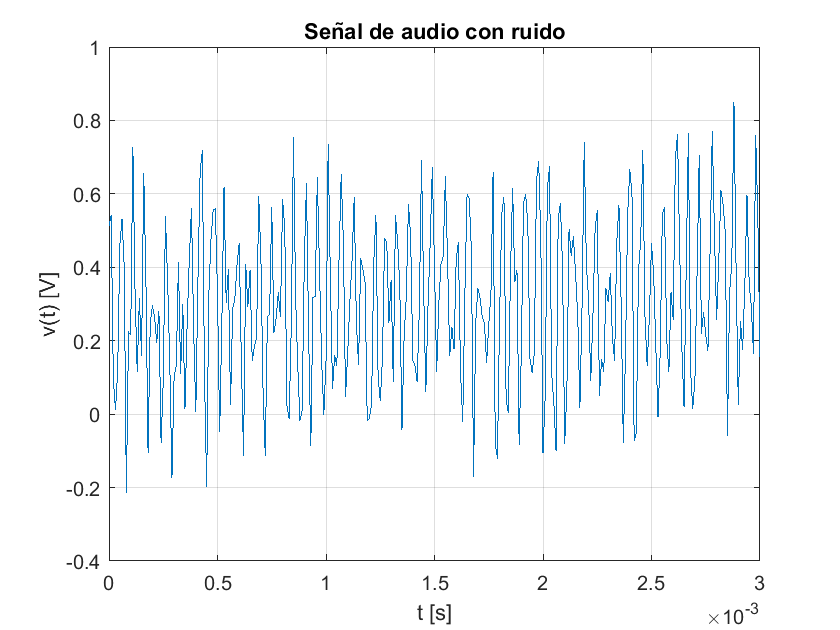

In [106]:
clear
close all
clc
dt=0.00001;
t=[0:dt:0.003];
vs=0.3*sin(2*pi*20*t)+0.25*cos(25*pi*1500*t)+0.5*rand(size(t));
plot(t,vs)
xlabel("t [s]")
ylabel("v(t) [V]")
title("Señal de audio con ruido")
set(gca,'fontsize',10);
grid on

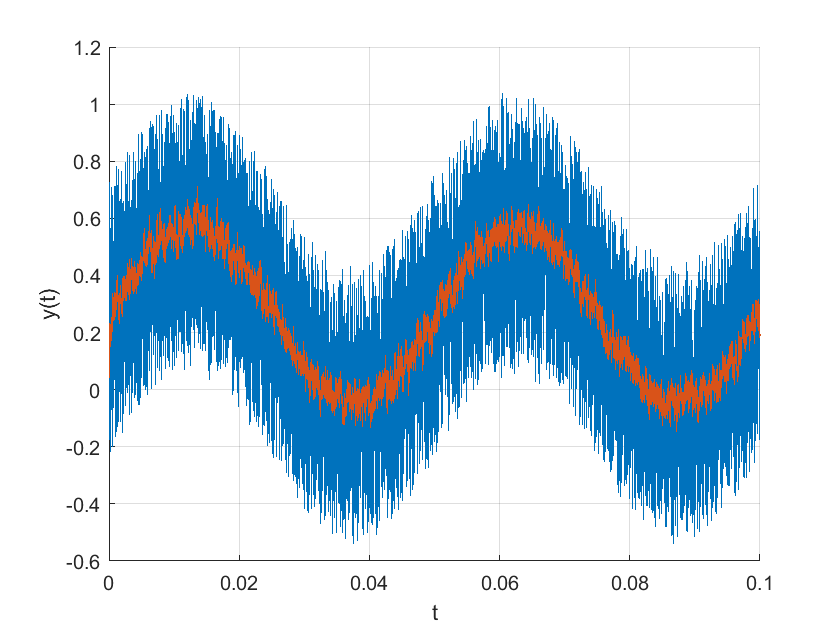

In [111]:
dt=0.00001;
t=[0:dt:0.1];
R=1000;
C=0.1e-6;

vs=@(x) (x>=0).*(0.3*sin(2*pi*20*x)+0.25*cos(25*pi*1500*x)+0.5*rand(size(x)));
ht=@(x,R,C) (x>=0).*(1/(R*C)).*exp(-x/(R*C));

yt=dt*conv(ht(t,R,C),vs(t));
t_conv=dt*(1:length(yt))+2*min(t);
figure
grid on
xlim([0 max(t)])
hold on
plot(t,vs(t))
plot(t_conv,yt);
xlabel("t")
ylabel("y(t)")

set(gca,'fontsize',10);


La respuesta del circuito RLC ante la misma señal con ruido es la siguiente:

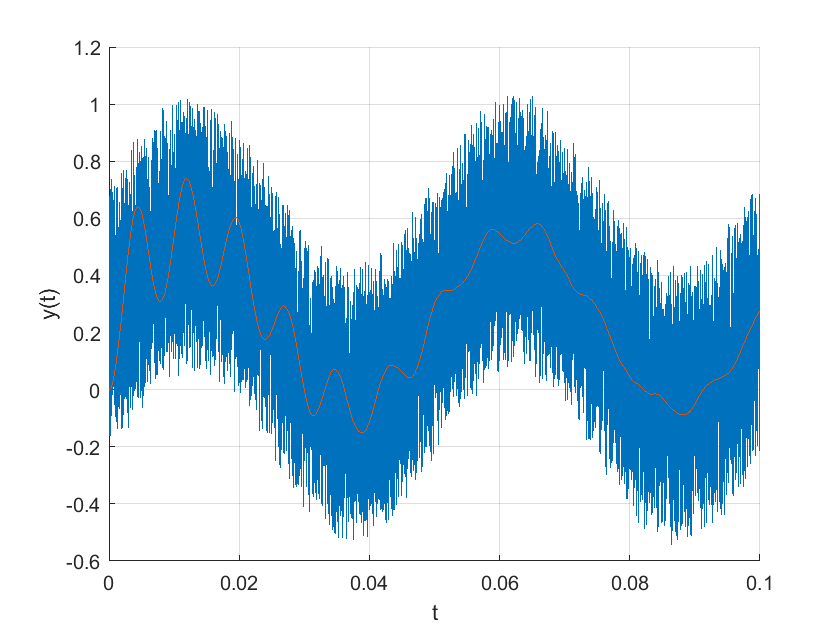

In [123]:
dt=0.00001;
t=[0:dt:0.1];
R=1000;
L=15.1;
C=0.1e-6;

vs=@(x) (x>=0).*(0.3*sin(2*pi*20*x)+0.25*cos(25*pi*1500*x)+0.5*rand(size(x)));
ht=@(x,alpha,betha) (betha+(alpha^2)/betha)*sin(betha*x).*exp(alpha*x);;


raices=roots([L*C R*C 1]); % Cálculo de las raices del polinomio auxiliar

alpha=real(raices(1)); % Se extraen las partes real e imaginaria
betha=imag(raices(1)); 


yt=dt*conv(ht(t,alpha,betha),vs(t));
t_conv=dt*(1:length(yt))+2*min(t);
figure
grid on
xlim([0 max(t)])
hold on
plot(t,vs(t))
plot(t_conv,yt);
xlabel("t")
ylabel("y(t)")

set(gca,'fontsize',10);